In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataframe = pd.read_csv('Bank Customer Churn Prediction.csv')

In [4]:
dataframe.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dataframe.tail()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,15628319,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
dataframe.shape

(10000, 12)

In [11]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
dataframe.describe(include = 'object')

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [13]:
dataframe.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
dataframe.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [15]:
dataframe["gender"].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

<Axes: title={'center': 'Distribution'}>

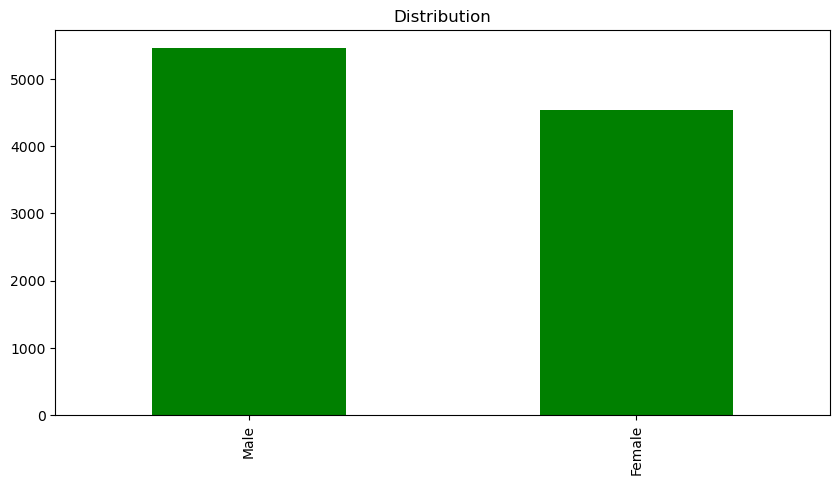

In [12]:
dataframe['gender'].value_counts().plot(kind = 'bar', 
                                 figsize = (10, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

In [13]:
dataframe["country"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<Axes: title={'center': 'Distribution'}>

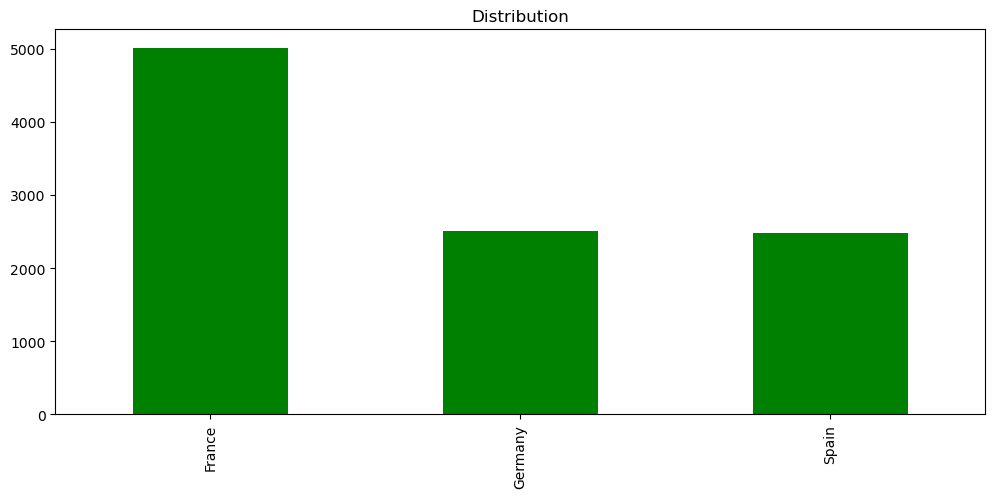

In [14]:
dataframe['country'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

In [15]:
dataframe["churn"].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<Axes: title={'center': 'Distribution'}>

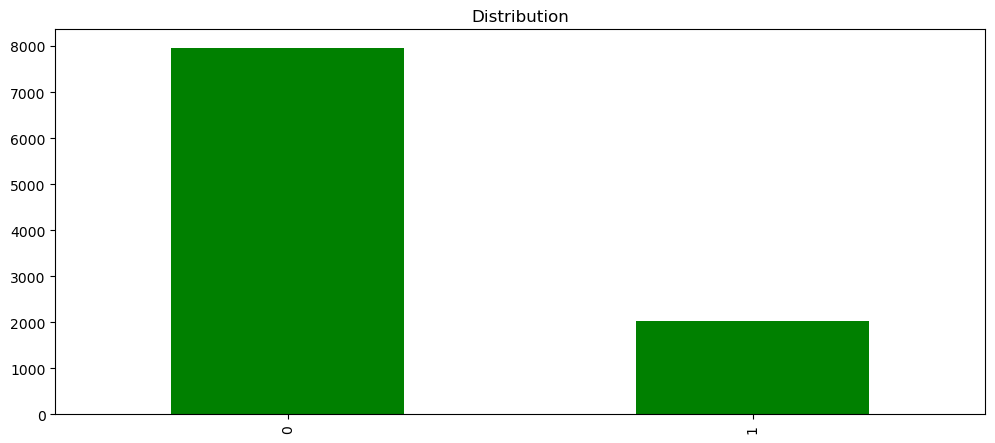

In [16]:
dataframe['churn'].value_counts().plot(kind = 'bar', 
                                 figsize = (12, 5), 
                                 title = 'Distribution', 
                                 cmap = 'ocean')

In [17]:
dataframe["age"].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64

<Axes: >

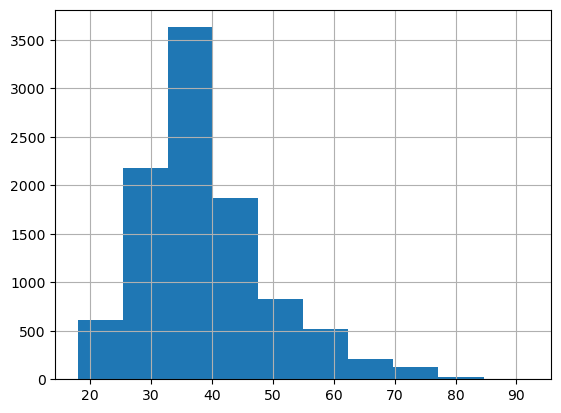

In [18]:
dataframe["age"].hist()

In [27]:
scaler=MinMaxScaler()
normalized_df=scaler.fit_transform(df)
normalized_df

array([[0.32432432, 0.2       ],
       [0.31081081, 0.1       ],
       [0.32432432, 0.8       ],
       ...,
       [0.24324324, 0.7       ],
       [0.32432432, 0.3       ],
       [0.13513514, 0.4       ]])

In [24]:
scaler=StandardScaler()
standard_df=scaler.fit_transform(df)
standard_df

array([[ 0.29351742, -1.04175968],
       [ 0.19816383, -1.38753759],
       [ 0.29351742,  1.03290776],
       ...,
       [-0.27860412,  0.68712986],
       [ 0.29351742, -0.69598177],
       [-1.04143285, -0.35020386]])

### Numerical Analysis

In [13]:
corr_matrix = dataframe.corr()

C:\Users\Menda Raghava\AppData\Local\Temp\ipykernel_5632\4019550931.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataframe.corr()


In [14]:
corr_matrix

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


C:\Users\Menda Raghava\AppData\Local\Temp\ipykernel_5632\608757233.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr()['churn'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

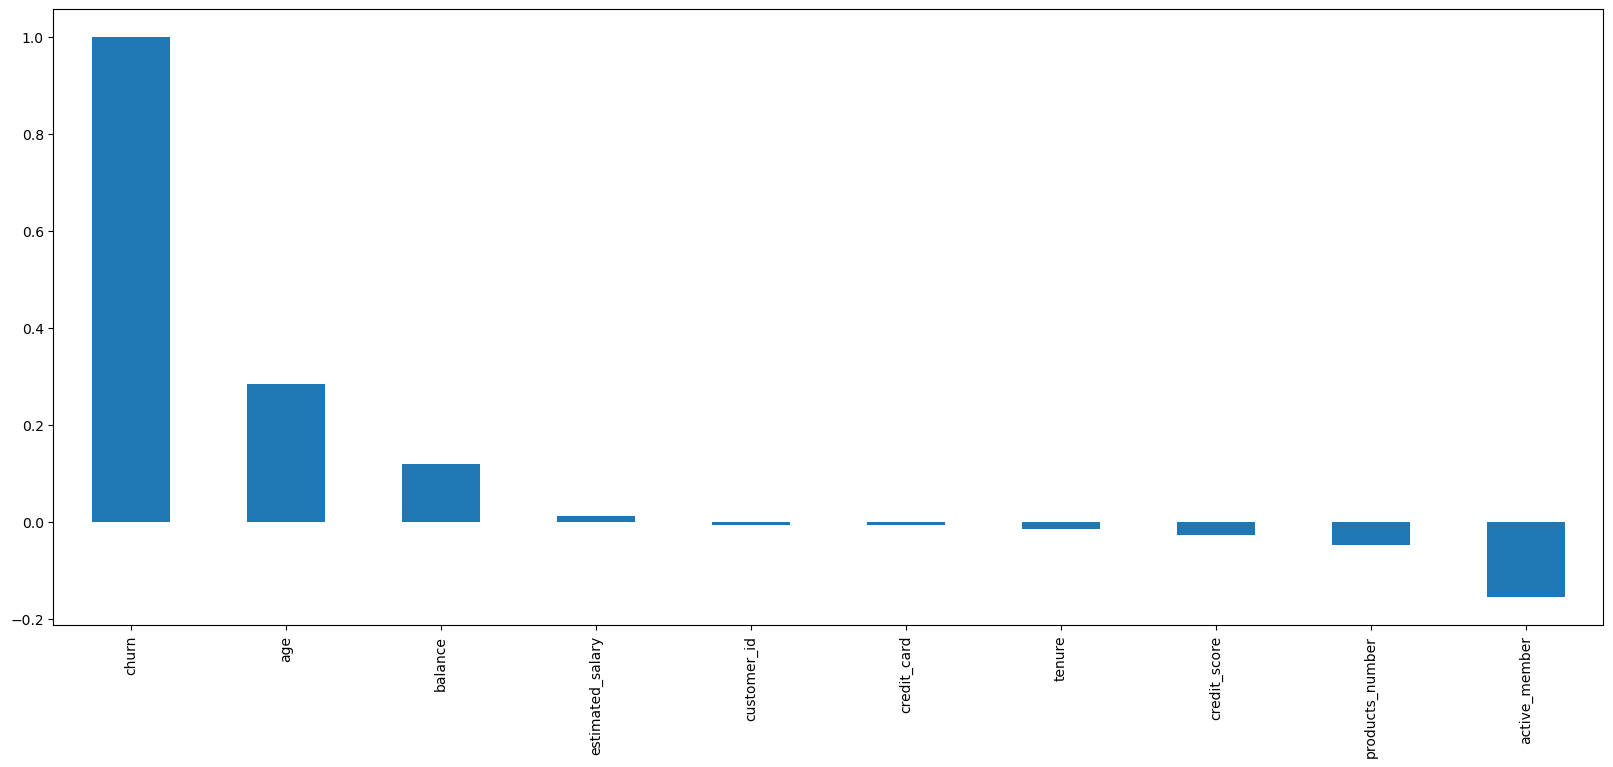

In [15]:
plt.figure(figsize=[20,8])
dataframe.corr()['churn'].sort_values(ascending=False).plot(kind='bar')

 Correlation Coefficients: The correlation matrix provides numerical values ranging from -1 to 1.
Values close to 1 indicate a strong positive relationship (as one variable increases, the other tends to increase).
Values close to -1 indicate a strong negative relationship (as one variable increases, the other tends to decrease).
Values close to 0 indicate a weak or no linear relationship between variables.

<Axes: >

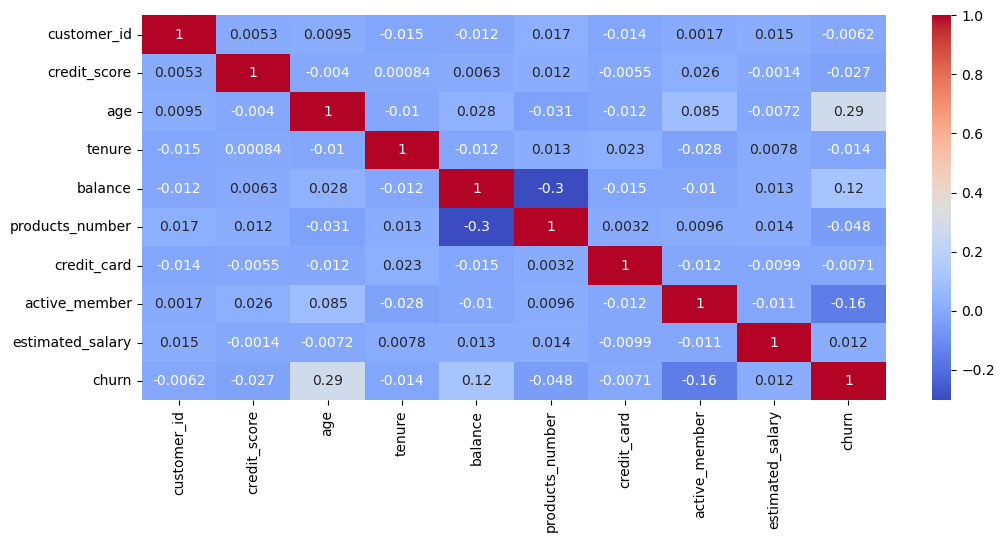

In [16]:
plt.figure(figsize = (12, 5))
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm')

In [18]:
abs(corr_matrix['churn']).sort_values(ascending=False).round(2)

churn               1.00
age                 0.29
active_member       0.16
balance             0.12
products_number     0.05
credit_score        0.03
tenure              0.01
estimated_salary    0.01
credit_card         0.01
customer_id         0.01
Name: churn, dtype: float64

##### age, active_member, balance show a relatively stronger correlation with the outcome of churn

<Axes: >

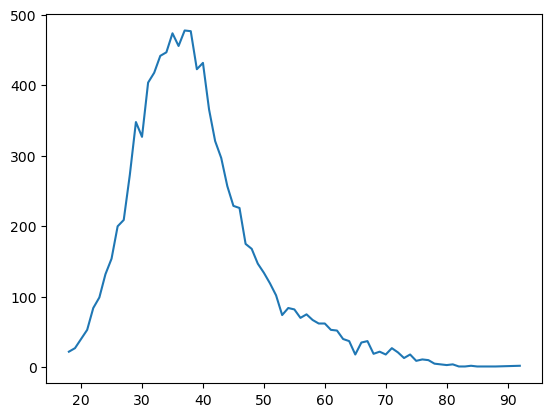

In [32]:
dataframe['age'].value_counts().sort_index(ascending=True).plot()

In [33]:
dataframef1=dataframe.loc[dataframe['churn']==1]

<Axes: >

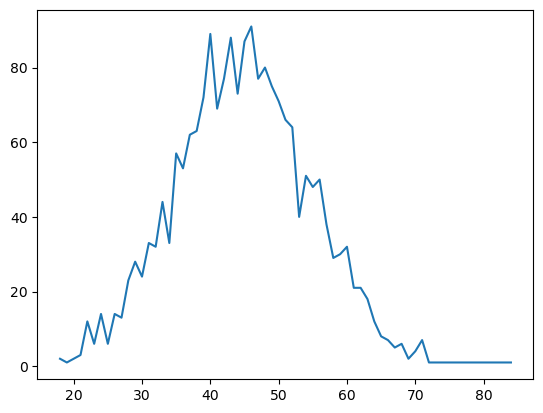

In [34]:
dataframe1['age'].value_counts().sort_index(ascending=True).plot()

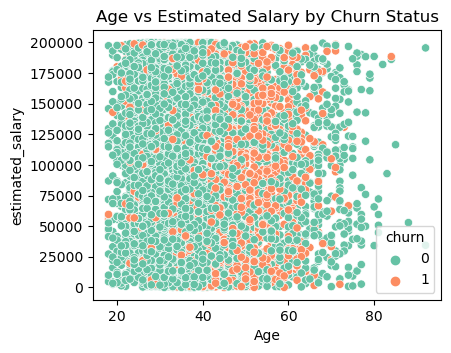

In [30]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='age', y='estimated_salary', hue='churn', data=dataframe, palette='Set2')
plt.title('Age vs Estimated Salary by Churn Status')
plt.xlabel('Age')
plt.ylabel('estimated_salary')
plt.show()

##### Most churners lie within the age group of 40-60 years

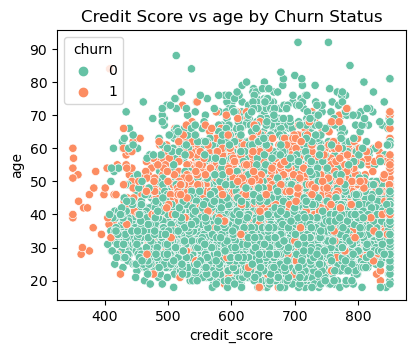

In [24]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='credit_score', y='age', hue='churn', data=dataframe, palette='Set2')
plt.title('Credit Score vs age by Churn Status')
plt.xlabel('credit_score')
plt.ylabel('age')
plt.show()

##### From the above plot High Credit Score with below age 50 are less likely to Churn .Whose Credit Score is high but age is above 50 are more likely to Churn

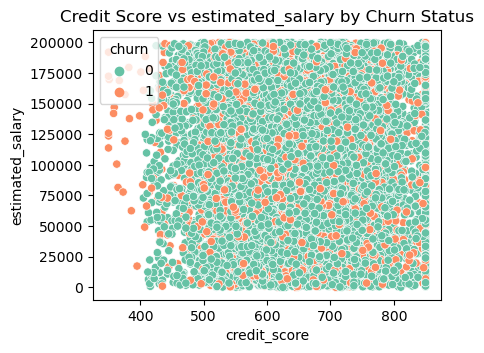

In [27]:
plt.figure(figsize=(4.5, 3.5))
sns.scatterplot(x='credit_score', y='estimated_salary', hue='churn', data=dataframe, palette='Set2')
plt.title('Credit Score vs estimated_salary by Churn Status')
plt.xlabel('credit_score')
plt.ylabel('estimated_salary')
plt.show()

##### Customers with a credit score < 400 are mostly churners

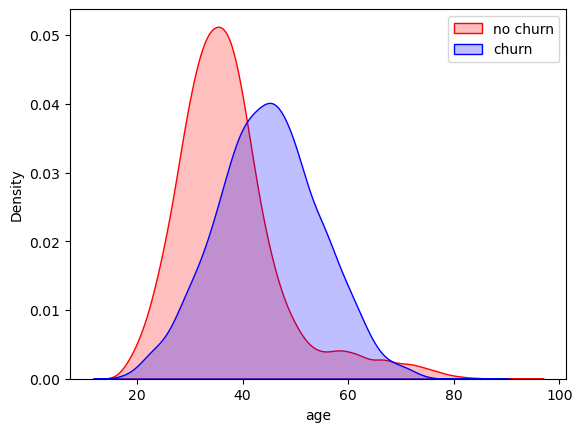

In [5]:
Tot=sns.kdeplot(dataframe.age[(dataframe['churn']==0)],color='red',fill=True)
Tot=sns.kdeplot(dataframe.age[(dataframe['churn']==1)],color='blue',fill=True)
Tot.legend(['no churn','churn'],loc='upper right')


##### The age between 40-50 years customers are more likely to churn

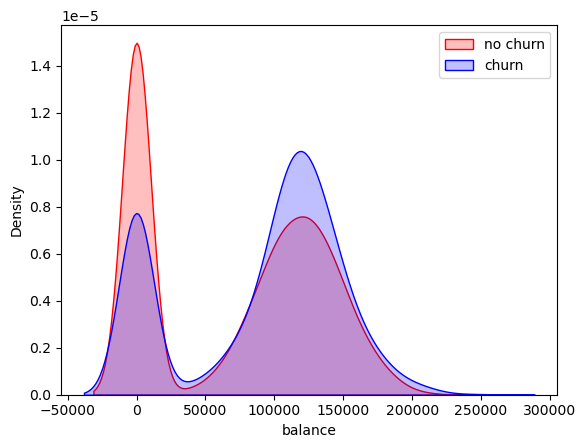

In [6]:
Tot=sns.kdeplot(dataframe.balance[(dataframe['churn']==0)],color='red',fill=True)
Tot=sns.kdeplot(dataframe.balance[(dataframe['churn']==1)],color='blue',fill=True)
Tot.legend(['no churn','churn'],loc='upper right')


##### The people having less balance are not churned compared to people who are having more balance.

### Categorical Analysis

<Axes: xlabel='churn', ylabel='count'>

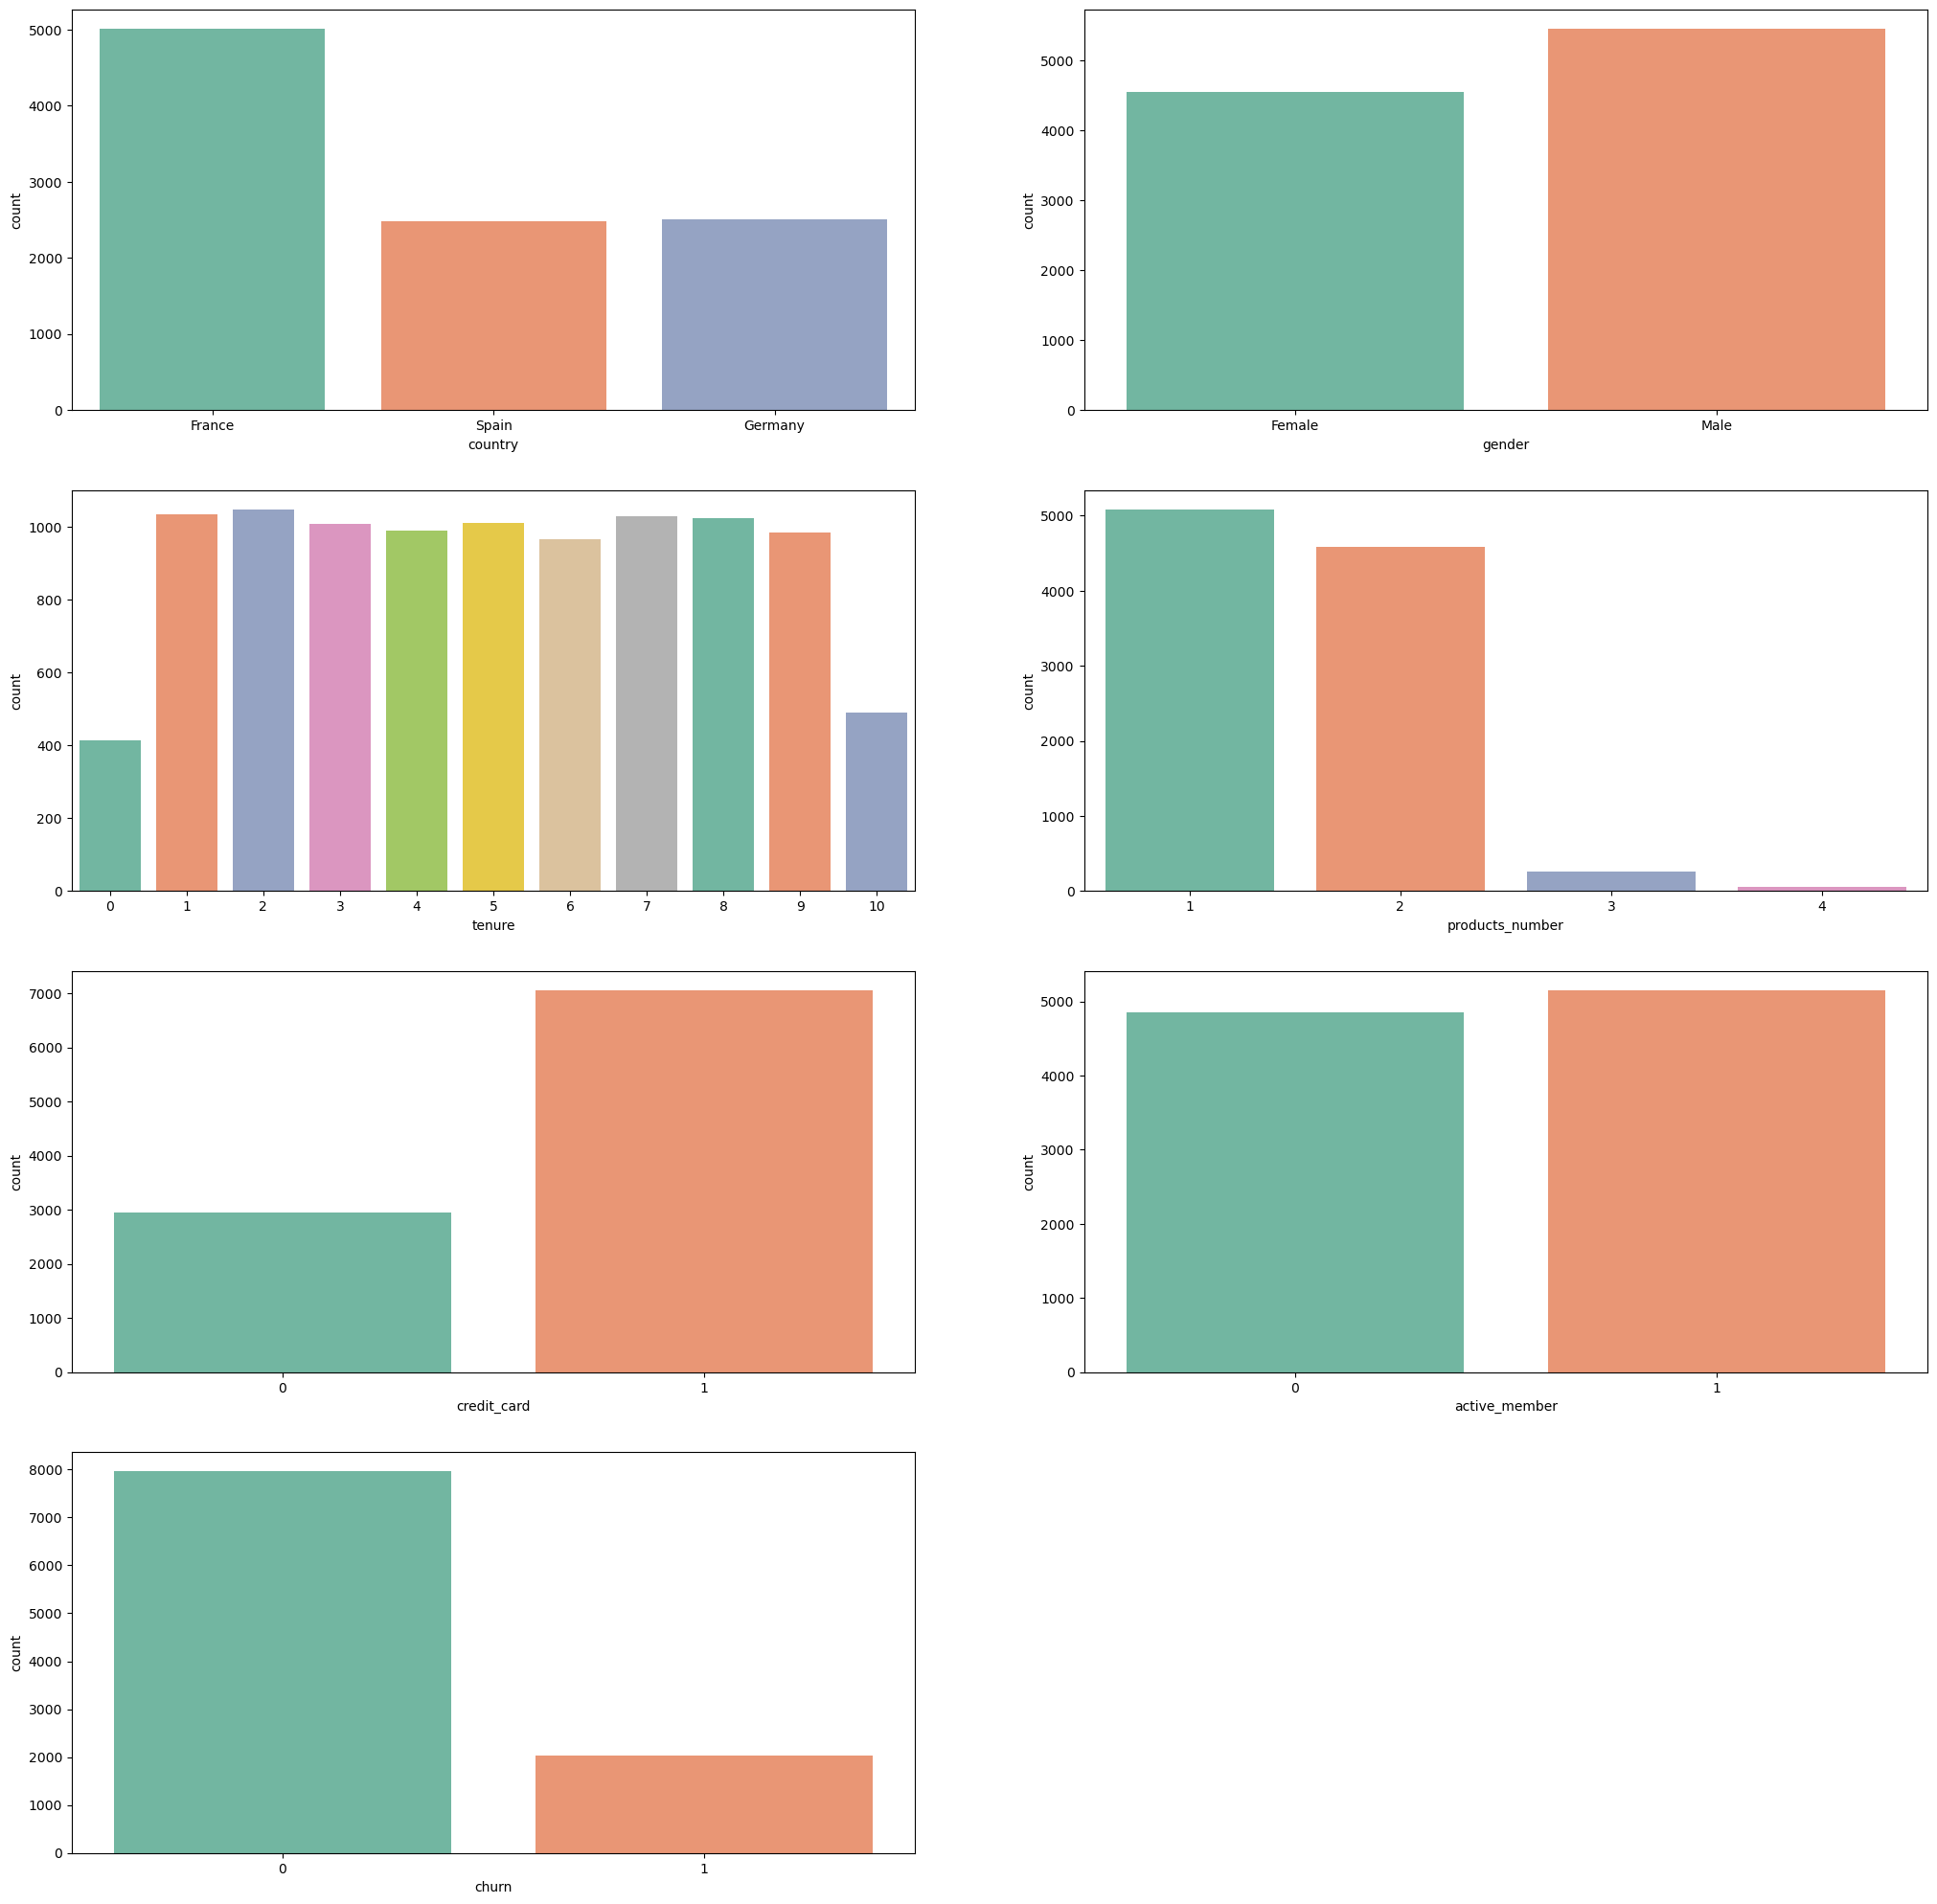

In [28]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
sns.countplot(x = 'country', palette='Set2', data = dataframe)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set2', data = dataframe)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = dataframe)

plt.subplot(4,2,4)
sns.countplot(x = 'products_number', palette='Set2', data = dataframe)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set2', data = dataframe)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set2', data = dataframe)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set2', data = dataframe)

 we were able to verify that our base has a predominance of French population, we have a slight amount of men greater than women, looking at the tenure variable we can see that we have a good distribution taking the values ​​0 and 10, looking at the variable product_number we can see that we have a predominance in products 1 and 2, we can also verify that most transactions are made by credit card, when we look at our target variable we can see that we have much more negative values ​​than positive ones.

### Univariate Analysis

In [4]:
df=dataframe[['country','gender','churn']]
df.head(5)

,country,gender,churn
0,France,Female,1
1,Spain,Female,0
2,France,Female,1
3,France,Female,0
4,Spain,Female,0


In [7]:
dataframe.churn.value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [8]:
dataframe.churn.value_counts()/(len(dataframe))*100

0    79.63
1    20.37
Name: churn, dtype: float64

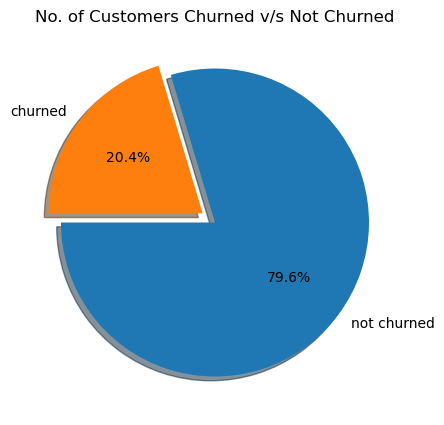

In [6]:
class_counts = dataframe['churn'].value_counts()
fig = plt.figure(figsize=(5,5)) 
plt.pie(class_counts, labels=['not churned','churned'],explode=(0,0.1),shadow=True, autopct="%1.1f%%", startangle=180)
plt.title('No. of Customers Churned v/s Not Churned')
plt.show()

<Axes: xlabel='active_member', ylabel='count'>

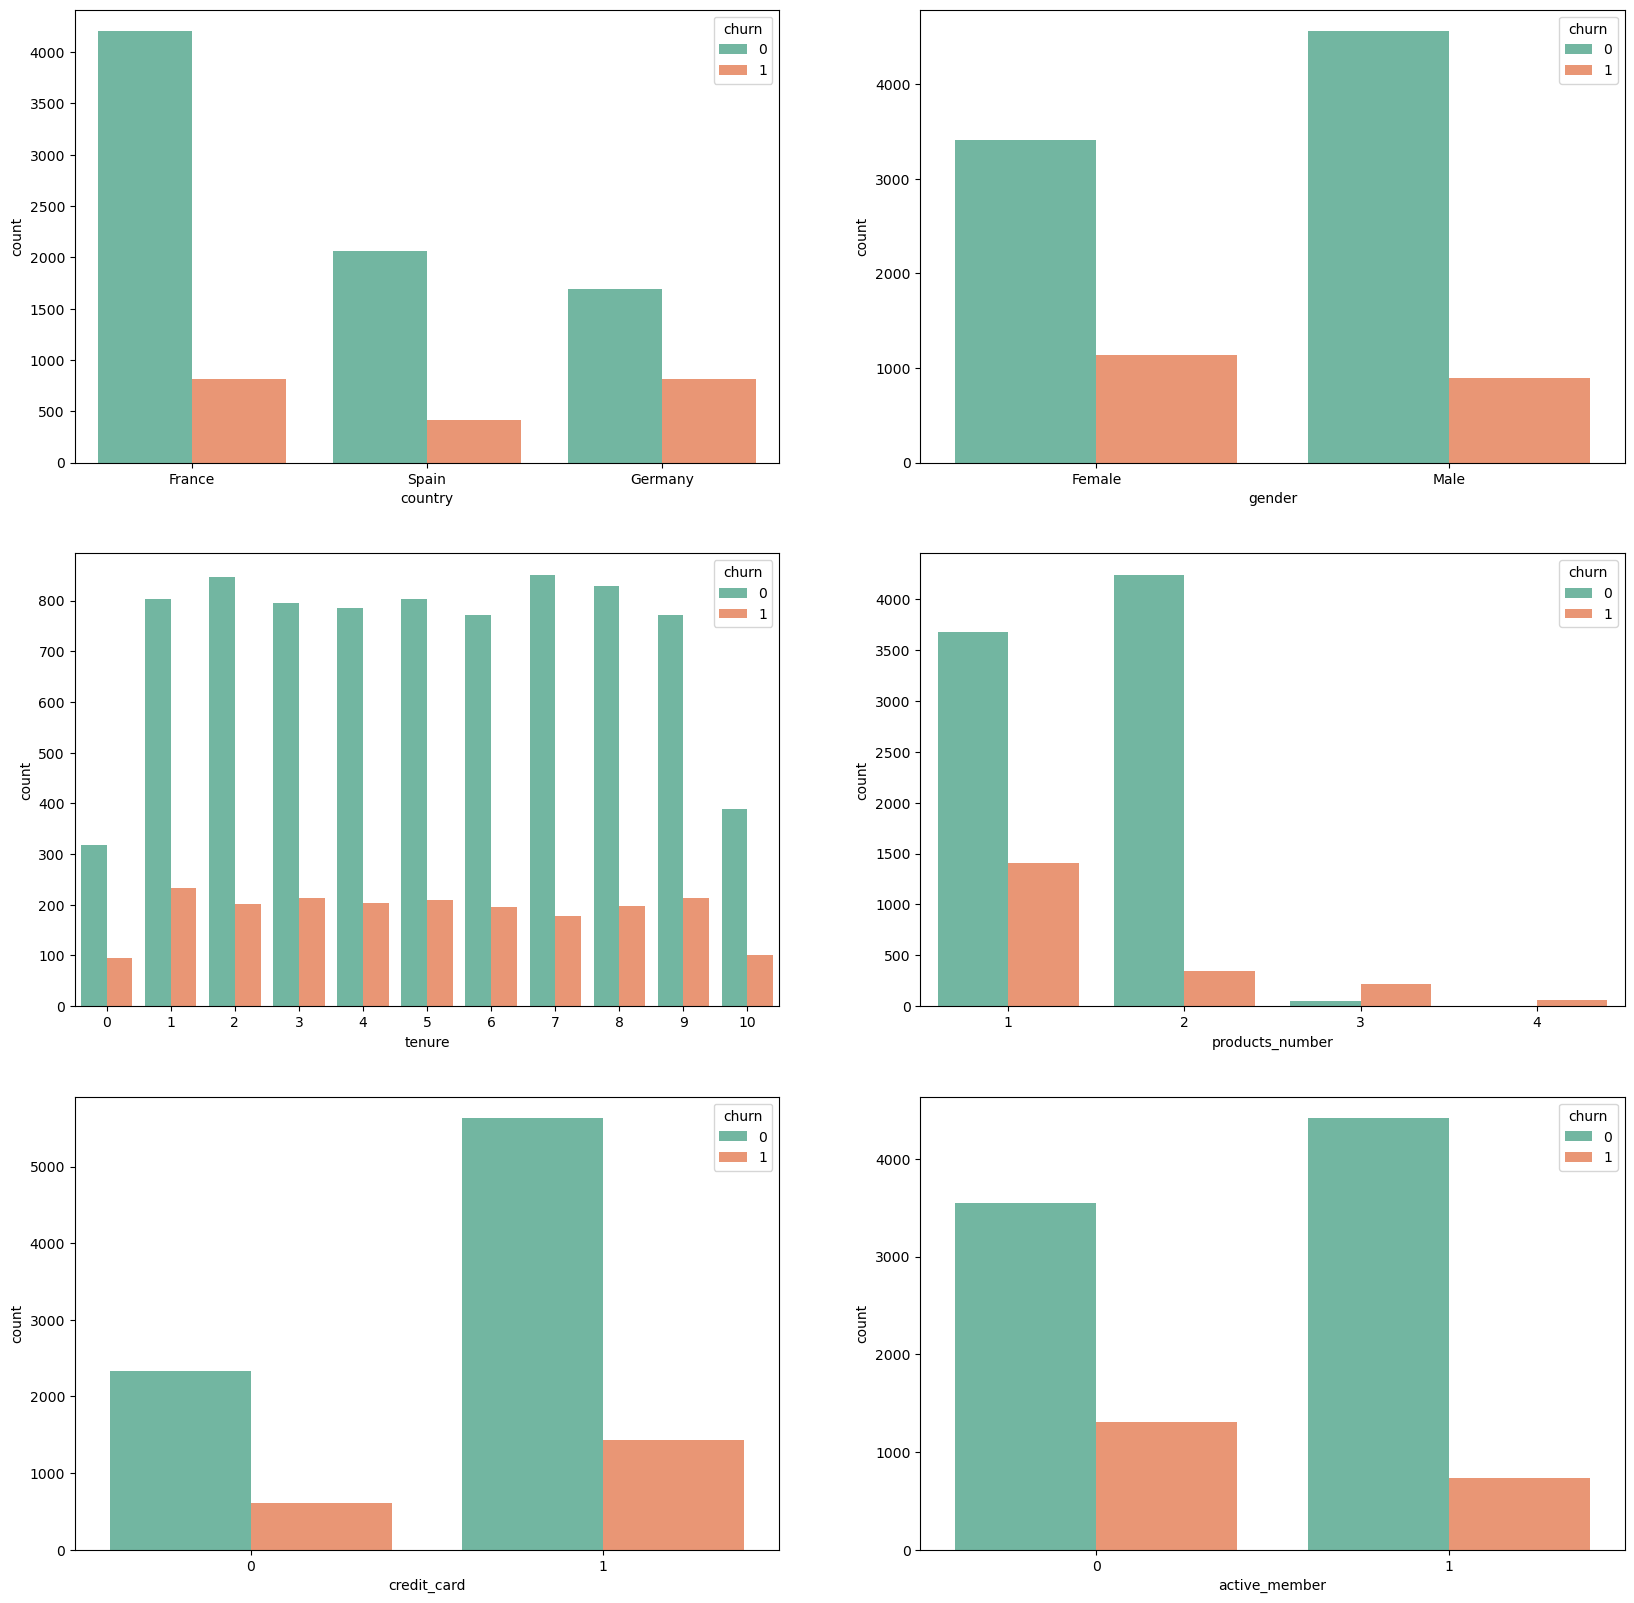

In [6]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'country', hue= 'churn', palette='Set2', data = dataframe)

plt.subplot(3,2,2)
sns.countplot(x = 'gender', hue= 'churn', palette='Set2', data =dataframe )

plt.subplot(3,2,3)
sns.countplot(x = 'tenure', hue= 'churn', palette='Set2', data = dataframe)

plt.subplot(3,2,4)
sns.countplot(x = 'products_number', hue= 'churn', palette='Set2', data = dataframe)

plt.subplot(3,2,5)
sns.countplot(x = 'credit_card', hue= 'churn', palette='Set2', data = dataframe)

plt.subplot(3,2,6)
sns.countplot(x = 'active_member', hue= 'churn', palette='Set2', data = dataframe)

##### From the above plot the overall churn rate is 20% but churnm rate in france,spain and Germany are 16%,12%,32%.the people of Germany are more churned compared to overall churn Percentage.From this Geman people are more churners.Female are more churners compared to male.

<Axes: xlabel='churn', ylabel='count'>

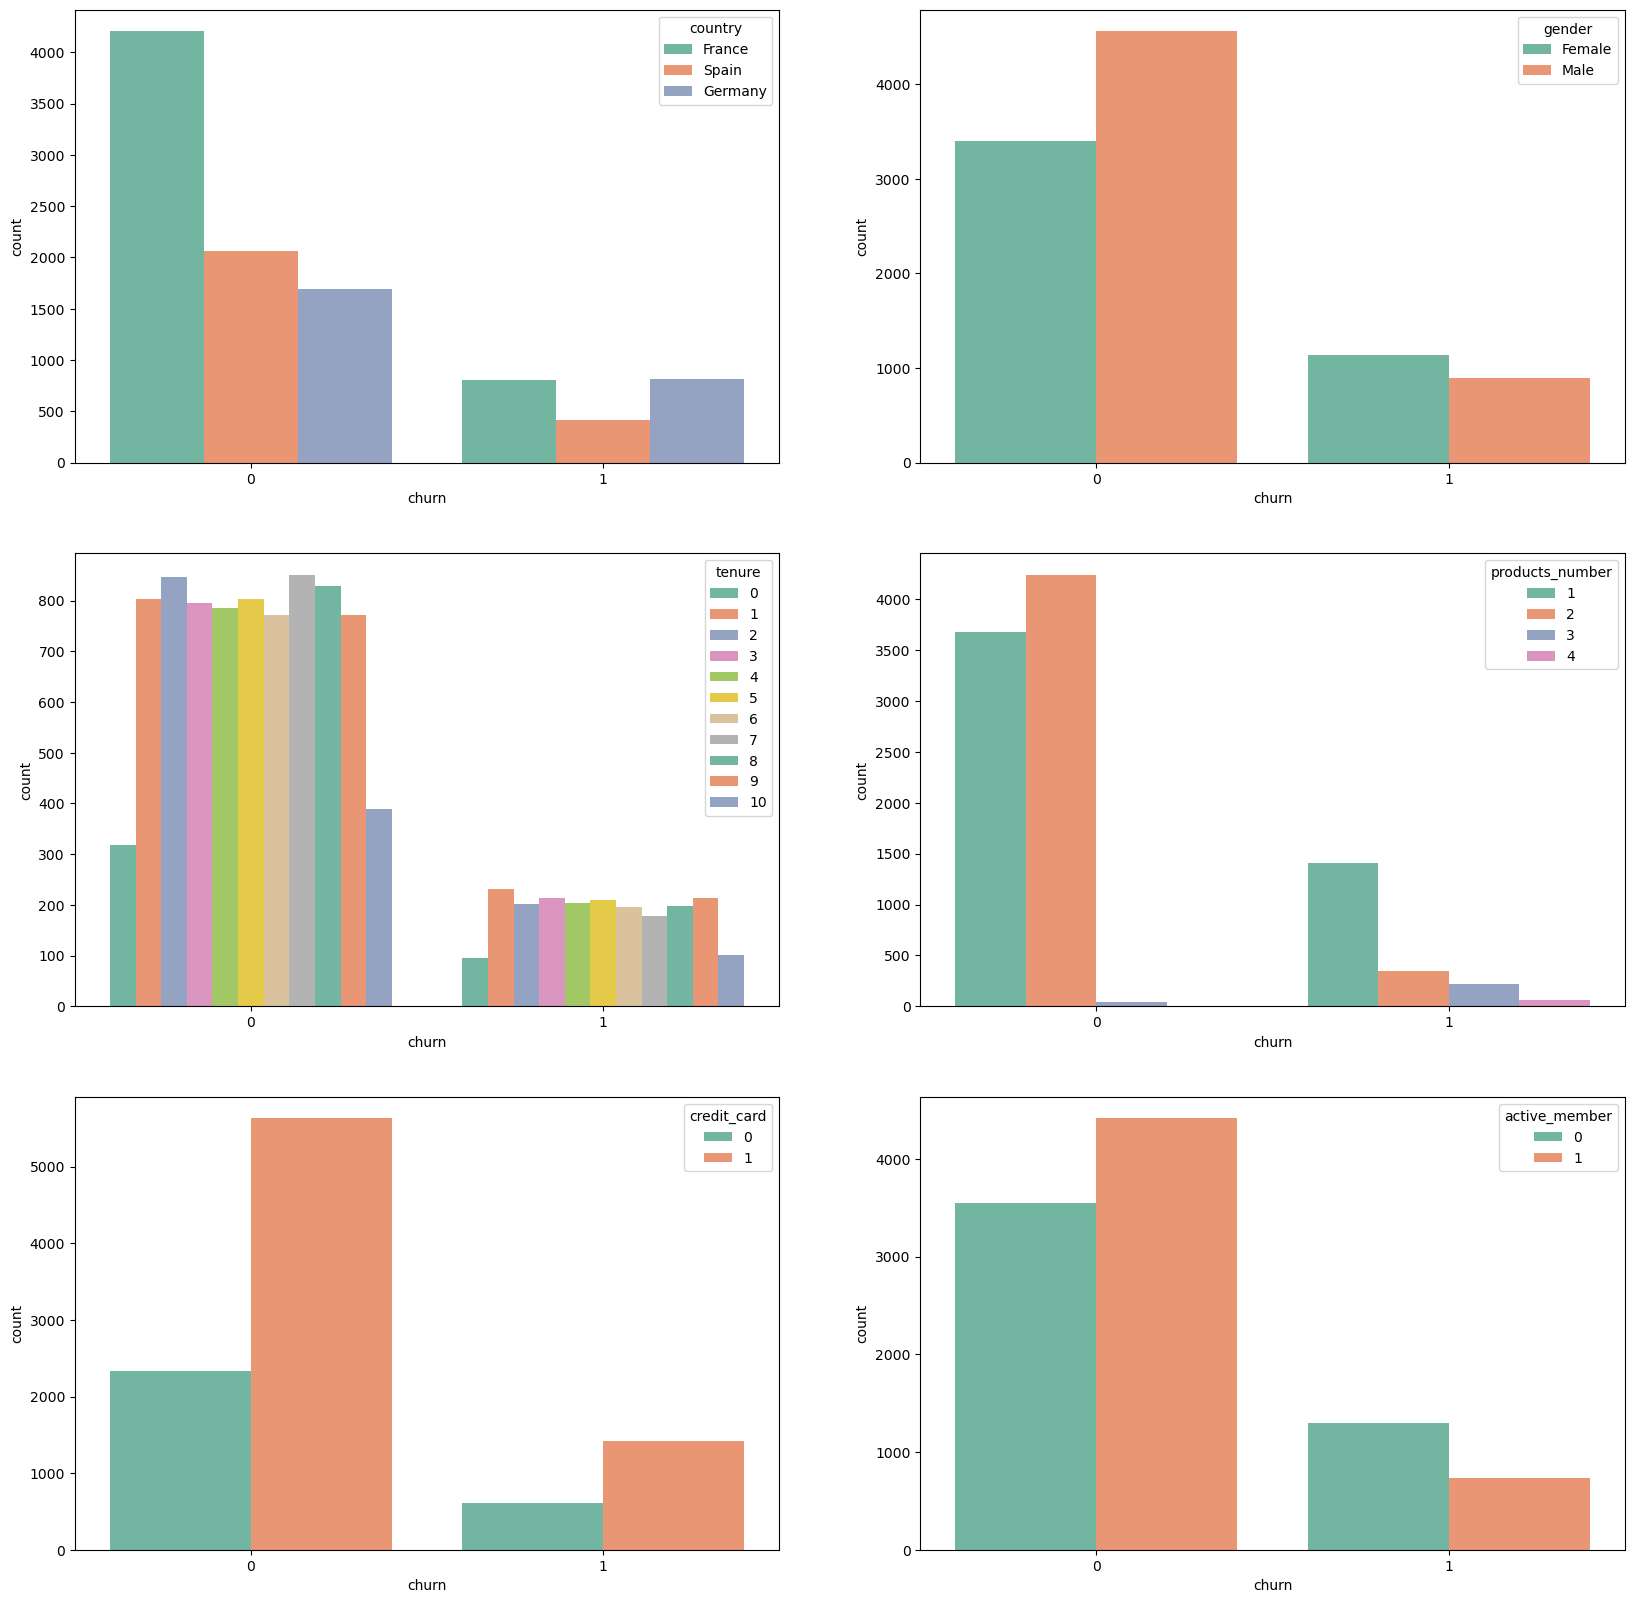

In [27]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = dataframe)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set2', data =dataframe )

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = dataframe)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set2', data = dataframe)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set2', data = dataframe)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set2', data = dataframe)

### Bivariate Analysis

In [26]:
dataframe1=dataframe.loc[dataframe['churn']==1]

<Axes: xlabel='gender', ylabel='Count'>

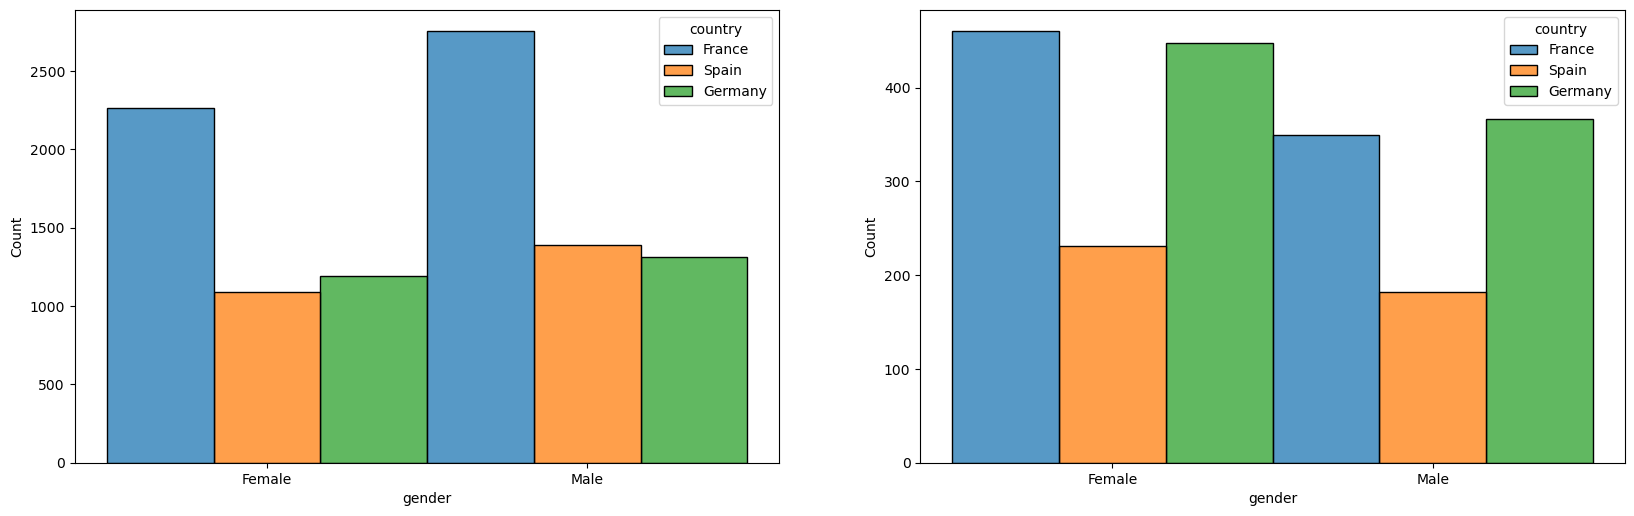

In [27]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.histplot(x = 'gender',hue= 'country',stat='count',multiple='dodge',data = dataframe)

plt.subplot(3,2,2)
sns.histplot(x = 'gender',hue= 'country', stat='count',multiple='dodge', data =dataframe1)


##### From the above graph the female german churn is 36% and male german churners are 29%.By this we can say that in german people female are more churned compared to male.